# Modelo de classificação para Predição de Doenças Coronárias
### Assignment 18 - DNC Data Expert

In [109]:
import pandas as pd
import numpy as np
import time
from sklearn import preprocessing
from sklearn.preprocessing import *
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.pipeline import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.naive_bayes import *
from sklearn.tree import *
from sklearn.multiclass import *
from sklearn import *

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
import warnings

INFORMAÇÕES DO DATASET:
- age: Idade (Anos)
- sex: Sexo (1 = Masc e 0 = Fem)
- cp: Nível de dor ( 1 a 4 )
- trestbps: Pressão sanguínea em Repouso
- chol: colesterol em mg/dl:
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)
- thalach: Ritmo cardíaco
- exang: Exercício físico que gerou Angina
- oldpeak: Depressão de ST induzida por exercício em relação ao
repouso
- slope: Tipo de inclinação do segmento ST de pico do exercício
- ca: número de vasos sanguínios ressaltados (coloridos por
fluoroscopia)
- thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable
defect


In [67]:
df = pd.read_csv('/content/heart.csv')

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Exploratory Data Analysis(EDA)

## Dtypes

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Shape

In [15]:
df.shape

(302, 14)

# Basic Description

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Dados Nulos

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Drop Duplicates

In [56]:
df = df.drop_duplicates()

# Dados Categóricos

In [19]:
df.nunique().sort_values(ascending=False)

chol        152
thalach      91
trestbps     49
age          41
oldpeak      40
ca            5
thal          4
cp            4
slope         3
restecg       3
target        2
exang         2
fbs           2
sex           2
dtype: int64

# Remoção de Outliers

In [69]:
def replace_outliers(df, var_names):
    for var_name in var_names:
        # calculating Q1 and Q3
        Q1 = df.loc[:,var_name].quantile(0.15)
        Q3 = df.loc[:,var_name].quantile(0.85)
        # calculating Interquartile IQR
        IQR = Q3 - Q1
        # build up filter
        filter_up = (df.loc[:,var_name] > Q3 + 1.5 *IQR)
        # apply up filter on df
        df.loc[filter_up, var_name] = Q3 + 1.5 *IQR
        # build down filter
        filter_down = (df.loc[:,var_name] < Q1 - 1.5 * IQR)
        # apply down filter on df
        df.loc[filter_down, var_name] = Q1 - 1.5 * IQR

In [73]:
replace_outliers(df,df.columns)

In [76]:
df.isnull().sum().sum()

0

# Data Visualization

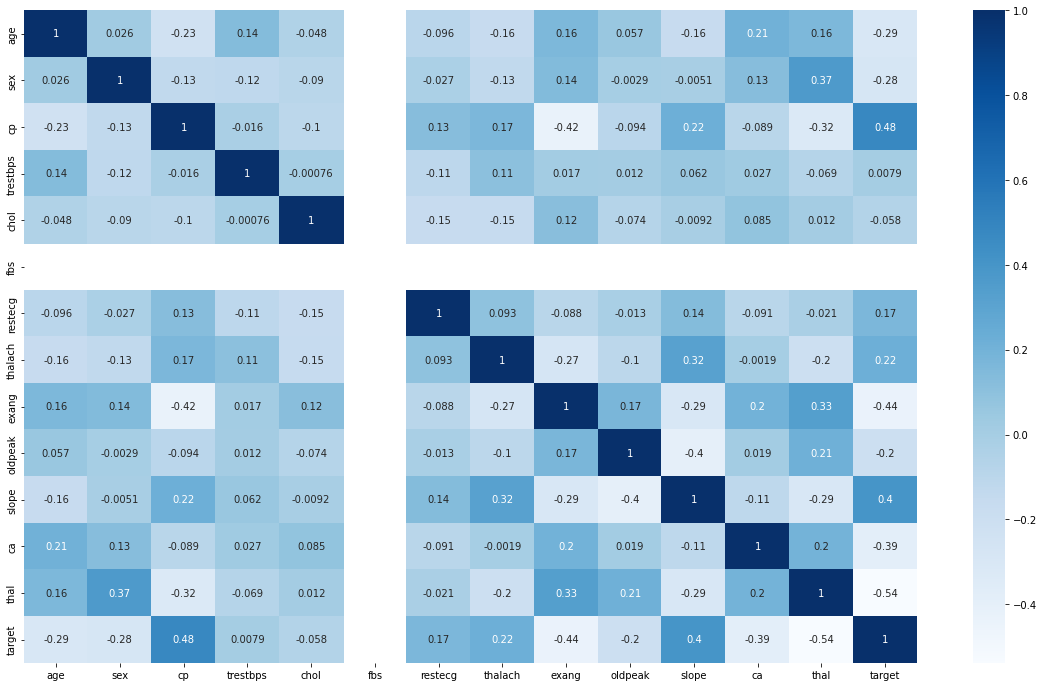

In [44]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

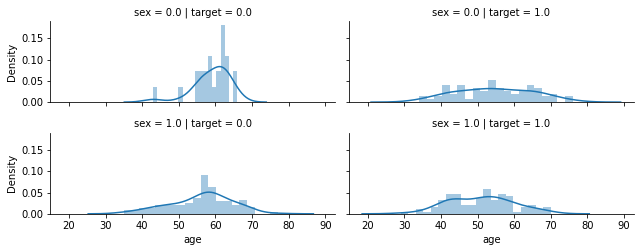

In [117]:
g = sns.FacetGrid(df, col='target', row='sex', height=1.8, aspect=2.5)
g.map(sns.distplot, 'age', bins=20)

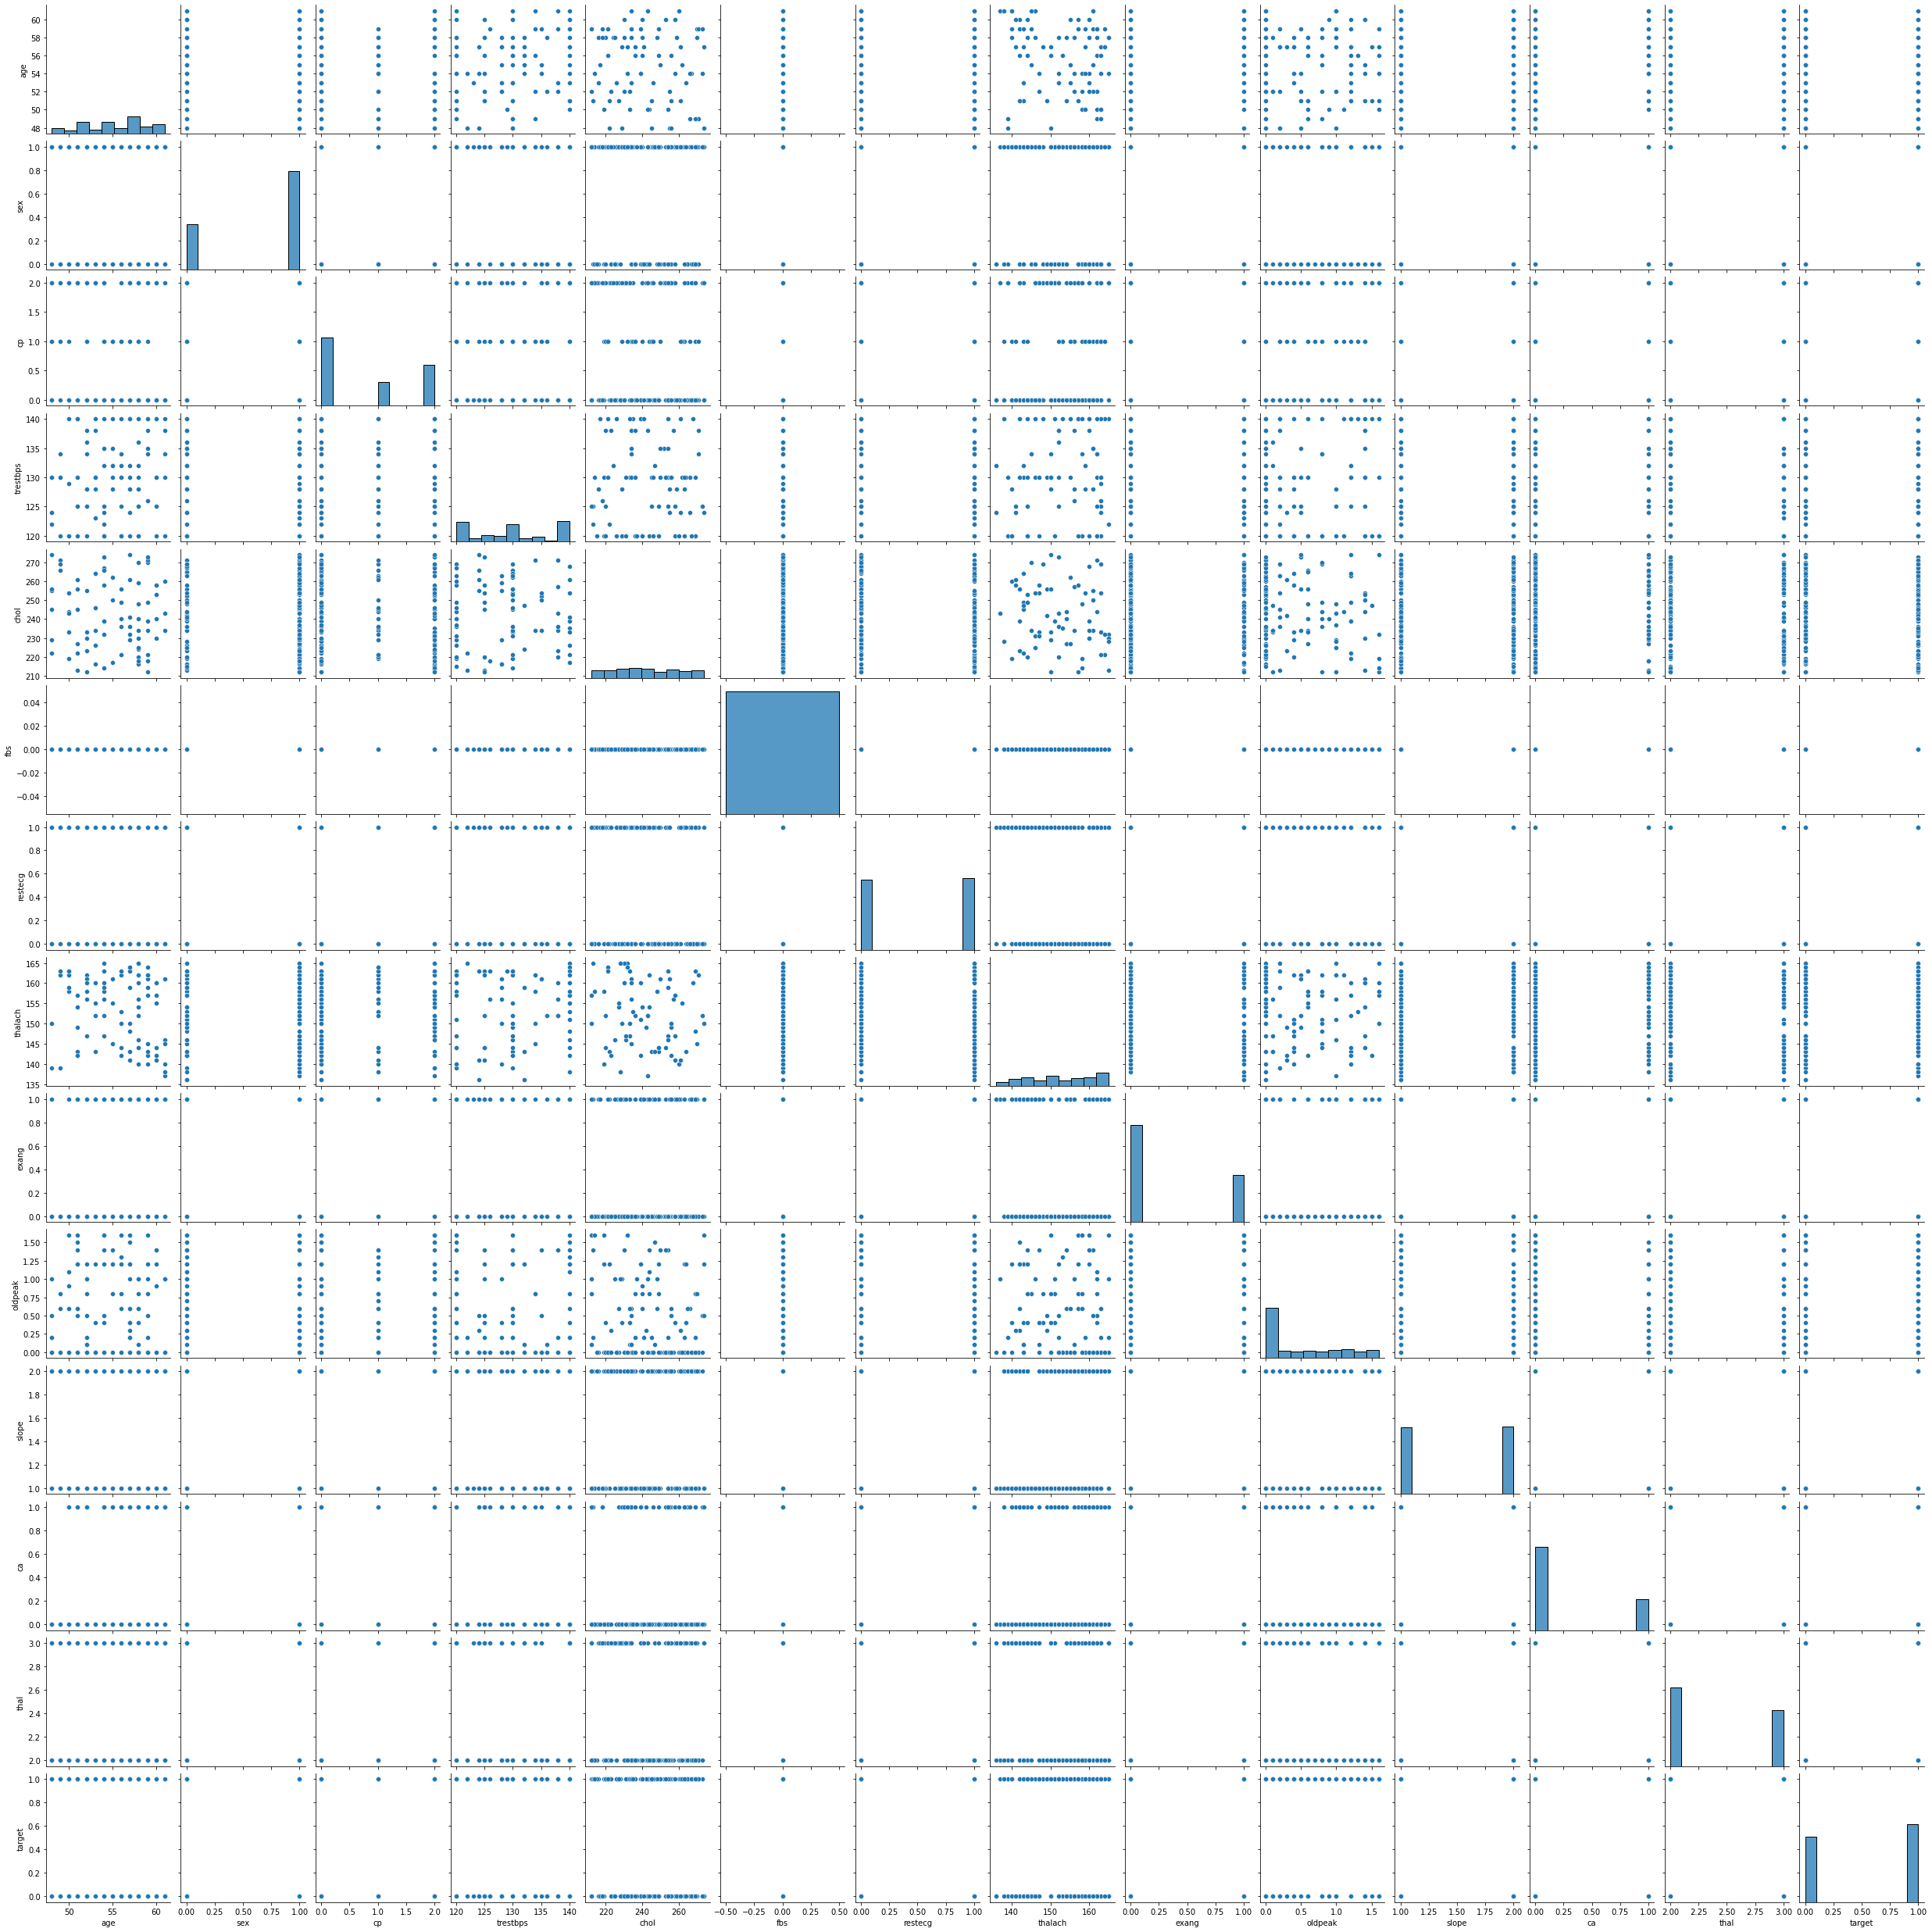

In [35]:
sns.pairplot(df)

# PCA Analyses

In [57]:
X = df.drop('target',axis=1)

In [58]:
pca = PCA(n_components=2)

In [59]:
pc = pca.fit_transform(X)

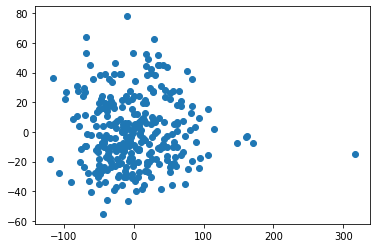

In [60]:
plt.scatter(pc[:,0], pc[:,1])

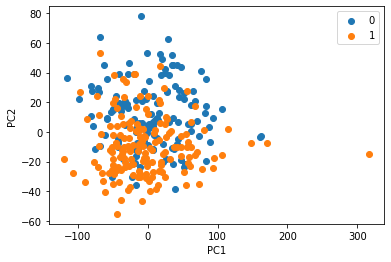

In [65]:
plt.scatter(pc[y==0,0], pc[y==0,1], label='0')
plt.scatter(pc[y==1,0], pc[y==1,1], label='1')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# ML Section

In [77]:
X = df.drop('target',axis=1)
y = df['target']

In [78]:
X.shape,y.shape

((303, 13), (303,))

# Selecionando o Melhor algoritmo para aplicarmos GridSearch

In [105]:
class Modelos_ML(object):
    
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def score(self,x,y):
        return self.clf.score(x,y)

modelos = [{'nome': 'AdaBoost',
             'modelo': AdaBoostClassifier},
           {'nome': 'Extra Tree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'LogisticRegression',
            'modelo': LogisticRegression}]

# Train/Test Split

In [106]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

# Aplicação dos Modelos

In [111]:
resultados = []
c=0
l=0
for model in modelos:
    x = Modelos_ML(clf=model['modelo'])

    # treino
    x.fit(X_train, y_train)

    # predicao
    x_pred = x.predict(X_test)


    # gerar scores
    acuracidade = round(accuracy_score(y_test,x_pred),3)
    mcc = round(metrics.matthews_corrcoef(y_test, x_pred),3)
    kappa = round(metrics.cohen_kappa_score(y_test,x_pred),3)
    precision = round(precision_score(y_test,x_pred),3)
    recall = round(recall_score(y_test,x_pred),3)
    f1 = round(f1_score(y_test,x_pred),3)
    r2 = r2_score(y_test,x_pred)
    r2_round = round(r2,2)




    # gerar cross val
    cv = cross_val_score(modelos[0+c]['modelo'](),X,y)
    cv_round = np.round(cv,decimals=2)
    c+=1


    resultados.append({'Model': model['nome'],
                       'Accuracy': acuracidade,
                       'Precision':precision,
                       'Recall':recall,
                       'F1_score':f1,
                       'MCC':mcc,
                       'preds':x_pred,
                       'Kappa':kappa,
                       'R2_score':r2_round,                      
                       'Cross_validation':cv_round})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [97]:
df_results = pd.DataFrame(resultados)
df_results

,Model,Accuracy,Precision,Recall,F1_score,MCC,preds,Kappa,R2_score,Cross_validation
0,AdaBoost,0.803,0.790,0.831,0.810,0.606,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",0.605,0.21,"[0.85, 0.84, 0.79, 0.77, 0.75]"
1,Extra Tree,0.836,0.795,0.909,0.848,0.678,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",0.670,0.34,"[0.87, 0.89, 0.8, 0.78, 0.8]"
2,LogisticRegression,0.796,0.750,0.896,0.817,0.603,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",0.591,0.18,"[0.84, 0.9, 0.85, 0.83, 0.75]"


#### Ressaltamos que o Extra tree classifier é o algoritmo que possui melhor f1_score pro nosso target e então utlizaremos dele para achar os melhores hiperparâmetros.

# Grid Search From Best Algorithm

In [79]:
reg = ExtraTreesClassifier()

In [83]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4)

In [84]:
parameters = {'max_depth':range(3, 21),'n_estimators':[50,100,150],'min_samples_split':[2,3,4]}

In [85]:
grd = GridSearchCV(reg, parameters, scoring='f1_micro')
grd.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprec

In [88]:
print("Best parameters from gridsearch: {}".format(grd.best_params_))
print("CV score=%0.3f" % grd.best_score_)
print('melhores estimadores: ',grd.best_estimator_)

cv_results = grd.cv_results_

Best parameters from gridsearch: {'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 100}
CV score=0.846
melhores estimadores:  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=9, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=4,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


# Os melhores Hiperparametros para o Extra Tree são:
{'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 100}